In [154]:
#from google.colab import drive
#drive.mount('/content/drive')

In [155]:
import pandas as pd
import numpy as np

In [156]:
names = ['Year','Month','ppt(mm)','tmax(degC)','tmin(degC)','aet(mm)','PDSI(unitless)','state','district','cluster14','cluster15','cluster18','cluster20','cluster25','cluster27','cluster30','cluster35']

In [157]:
df = pd.read_csv("/content/drive/MyDrive/agroclimatic_clusters.csv")

In [158]:
df.head()

,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),state,district,cluster14,cluster15,cluster18,cluster20,cluster25,cluster27,cluster30,cluster35
0,1958,1,0,32.1,16.6,2,-0.1,maharashtra,solapur,8,7,0,7,12,23,15,23
1,1958,2,0,34.2,18.4,2,-0.5,maharashtra,solapur,8,7,0,7,12,23,15,23
2,1958,3,17,38.5,21.5,17,0.2,maharashtra,solapur,8,7,0,7,12,23,15,23
3,1958,4,32,40.2,25.3,32,0.8,maharashtra,solapur,8,7,0,7,12,23,15,23
4,1958,5,68,40.5,25.8,65,1.5,maharashtra,solapur,8,7,0,7,12,23,15,23


In [159]:
df['cluster15'].value_counts()

5     89280
11    62496
4     55800
7     55056
14    31992
1     29760
8     27528
2     24552
9     22320
12    14136
0     10416
13     6696
6      5952
3      4464
10     1488
Name: cluster15, dtype: int64

In [160]:
a = []
for i in range(len(df)):
    if df['cluster15'][i]!=8:
        a.append(i)

In [161]:
df = df.drop(a)

In [162]:
df.head()

,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),state,district,cluster14,cluster15,cluster18,cluster20,cluster25,cluster27,cluster30,cluster35
17112,1958,1,50,30.4,22.5,55,0.8,tamil nadu,tirunelveli kattabo,4,8,10,13,22,4,19,22
17113,1958,2,78,31.6,23.5,79,1.4,tamil nadu,tirunelveli kattabo,4,8,10,13,22,4,19,22
17114,1958,3,130,34.4,25.2,126,2.2,tamil nadu,tirunelveli kattabo,4,8,10,13,22,4,19,22
17115,1958,4,101,34.4,26.4,98,2.7,tamil nadu,tirunelveli kattabo,4,8,10,13,22,4,19,22
17116,1958,5,103,34.7,27.5,99,3.5,tamil nadu,tirunelveli kattabo,4,8,10,13,22,4,19,22


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27528 entries, 17112 to 425567
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            27528 non-null  int64  
 1   Month           27528 non-null  int64  
 2   ppt(mm)         27528 non-null  int64  
 3   tmax(degC)      27528 non-null  float64
 4   tmin(degC)      27528 non-null  float64
 5   aet(mm)         27528 non-null  int64  
 6   PDSI(unitless)  27528 non-null  float64
 7   state           27528 non-null  object 
 8   district        27528 non-null  object 
 9   cluster14       27528 non-null  int64  
 10  cluster15       27528 non-null  int64  
 11  cluster18       27528 non-null  int64  
 12  cluster20       27528 non-null  int64  
 13  cluster25       27528 non-null  int64  
 14  cluster27       27528 non-null  int64  
 15  cluster30       27528 non-null  int64  
 16  cluster35       27528 non-null  int64  
dtypes: float64(3), int64(12), 

In [164]:
conditions = df[['Year','Month','ppt(mm)','tmax(degC)','tmin(degC)','aet(mm)','PDSI(unitless)','district']]
conditions.shape

(27528, 8)

In [165]:
conditions.isnull().sum(axis = 0)

Year              0
Month             0
ppt(mm)           0
tmax(degC)        0
tmin(degC)        0
aet(mm)           0
PDSI(unitless)    0
district          0
dtype: int64

In [166]:
conditions["date"] = conditions['Month'].astype('str')+'-'+conditions["Year"].astype(str)
conditions.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),district,date
17112,1958,1,50,30.4,22.5,55,0.8,tirunelveli kattabo,1-1958
17113,1958,2,78,31.6,23.5,79,1.4,tirunelveli kattabo,2-1958
17114,1958,3,130,34.4,25.2,126,2.2,tirunelveli kattabo,3-1958
17115,1958,4,101,34.4,26.4,98,2.7,tirunelveli kattabo,4-1958
17116,1958,5,103,34.7,27.5,99,3.5,tirunelveli kattabo,5-1958


In [167]:
conditions['Day'] = [1] * len(conditions['Month'])
conditions['date'] = pd.to_datetime(conditions[['Year','Month','Day']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [168]:
conditions.head()

,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),district,date,Day
17112,1958,1,50,30.4,22.5,55,0.8,tirunelveli kattabo,1958-01-01,1
17113,1958,2,78,31.6,23.5,79,1.4,tirunelveli kattabo,1958-02-01,1
17114,1958,3,130,34.4,25.2,126,2.2,tirunelveli kattabo,1958-03-01,1
17115,1958,4,101,34.4,26.4,98,2.7,tirunelveli kattabo,1958-04-01,1
17116,1958,5,103,34.7,27.5,99,3.5,tirunelveli kattabo,1958-05-01,1


In [169]:
conditions['mid_temp'] = 0.5*(conditions['tmax(degC)']+conditions['tmin(degC)'])
conditions.drop(columns = ['tmax(degC)','tmin(degC)'],inplace = True)
conditions.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Month,ppt(mm),aet(mm),PDSI(unitless),district,date,Day,mid_temp
17112,1958,1,50,55,0.8,tirunelveli kattabo,1958-01-01,1,26.45
17113,1958,2,78,79,1.4,tirunelveli kattabo,1958-02-01,1,27.55
17114,1958,3,130,126,2.2,tirunelveli kattabo,1958-03-01,1,29.80
17115,1958,4,101,98,2.7,tirunelveli kattabo,1958-04-01,1,30.40
17116,1958,5,103,99,3.5,tirunelveli kattabo,1958-05-01,1,31.10


In [170]:
conditions.tail()

,Year,Month,ppt(mm),aet(mm),PDSI(unitless),district,date,Day,mid_temp
425563,2019,8,133,128,-0.7,namakkal,2019-08-01,1,29.35
425564,2019,9,122,118,1.6,namakkal,2019-09-01,1,29.40
425565,2019,10,194,122,1.7,namakkal,2019-10-01,1,28.65
425566,2019,11,107,108,1.8,namakkal,2019-11-01,1,28.20
425567,2019,12,21,39,1.2,namakkal,2019-12-01,1,26.80


In [171]:
conditions_truncated = conditions.loc[(conditions['Year']>1980) & (conditions['Year']<2019)]
conditions_val = conditions.loc[conditions['Year']==2019]

train = conditions_truncated[['date','ppt(mm)','mid_temp','aet(mm)','district']]
train.rename(columns = {'mid_temp':'y'}, inplace = True)

train.reset_index(inplace = True)
train.drop(columns = 'index',inplace = True)
train.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date,ppt(mm),y,aet(mm),district
0,1981-01-01,58,26.20,99,tirunelveli kattabo
1,1981-02-01,28,27.35,61,tirunelveli kattabo
2,1981-03-01,52,30.10,60,tirunelveli kattabo
3,1981-04-01,68,31.05,71,tirunelveli kattabo
4,1981-05-01,55,32.00,56,tirunelveli kattabo


In [172]:
conditions_val

,Year,Month,ppt(mm),aet(mm),PDSI(unitless),district,date,Day,mid_temp
17844,2019,1,3,24,-1.8,tirunelveli kattabo,2019-01-01,1,27.20
17845,2019,2,63,68,-1.4,tirunelveli kattabo,2019-02-01,1,29.25
17846,2019,3,8,13,-2.3,tirunelveli kattabo,2019-03-01,1,31.60
17847,2019,4,48,49,-2.7,tirunelveli kattabo,2019-04-01,1,32.75
17848,2019,5,18,19,-3.3,tirunelveli kattabo,2019-05-01,1,34.05
...,...,...,...,...,...,...,...,...,...
425563,2019,8,133,128,-0.7,namakkal,2019-08-01,1,29.35
425564,2019,9,122,118,1.6,namakkal,2019-09-01,1,29.40
425565,2019,10,194,122,1.7,namakkal,2019-10-01,1,28.65
425566,2019,11,107,108,1.8,namakkal,2019-11-01,1,28.20


In [173]:
from fbprophet import Prophet

In [174]:

model = Prophet()

In [175]:
conditions_truncated.rename(columns = {'date':'ds'}, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [176]:
train.rename(columns = {'date':'ds'}, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [177]:
train.tail()


,ds,ppt(mm),y,aet(mm),district
16867,2018-08-01,100,28.45,98,namakkal
16868,2018-09-01,76,29.35,74,namakkal
16869,2018-10-01,194,27.70,128,namakkal
16870,2018-11-01,86,27.15,92,namakkal
16871,2018-12-01,27,27.15,41,namakkal


In [178]:
model.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [179]:
fut = model.make_future_dataframe(periods = 13, freq = 'M')

In [180]:

forecast = model.predict(fut)

In [181]:
forecast.tail()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
464,2019-08-31,28.405538,26.934031,32.413953,28.401154,28.409701,1.230720,1.230720,1.230720,1.230720,1.230720,1.230720,0.0,0.0,0.0,29.636258
465,2019-09-30,28.402687,24.550736,30.239370,28.396869,28.408224,-0.853304,-0.853304,-0.853304,-0.853304,-0.853304,-0.853304,0.0,0.0,0.0,27.549383
466,2019-10-31,28.399740,23.110804,28.746242,28.392371,28.407361,-2.484096,-2.484096,-2.484096,-2.484096,-2.484096,-2.484096,0.0,0.0,0.0,25.915645
467,2019-11-30,28.396889,22.508630,28.017110,28.388336,28.407010,-3.260967,-3.260967,-3.260967,-3.260967,-3.260967,-3.260967,0.0,0.0,0.0,25.135922
468,2019-12-31,28.393942,22.021186,27.986006,28.384110,28.406034,-3.396893,-3.396893,-3.396893,-3.396893,-3.396893,-3.396893,0.0,0.0,0.0,24.997050


In [182]:

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
464,2019-08-31,29.636258,26.934031,32.413953
465,2019-09-30,27.549383,24.550736,30.239370
466,2019-10-31,25.915645,23.110804,28.746242
467,2019-11-30,25.135922,22.508630,28.017110
468,2019-12-31,24.997050,22.021186,27.986006


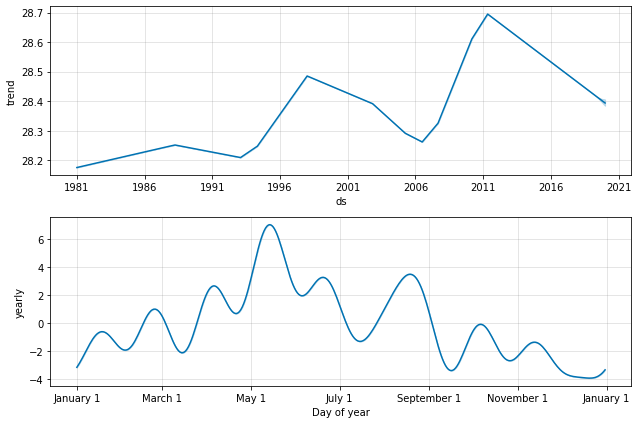

In [183]:
fig2 = model.plot_components(forecast)

In [184]:
forecast_2019 = forecast.tail(12)
forecast_2019["Month"] = forecast_2019["ds"].dt.month
print (forecast_2019[["yhat"]].shape,conditions_val[["mid_temp"]].shape)
test = pd.merge(conditions_val[["mid_temp","Month"]],forecast_2019[["yhat","Month"]])
# cols = ['ds','actual','yhat']
from sklearn.metrics import mean_squared_error
print (mean_squared_error(test["mid_temp"], test["yhat"]))
test

(12, 1) (444, 1)
7.100945186462428


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,mid_temp,Month,yhat
0,27.20,1,26.692711
1,25.40,1,26.692711
2,24.95,1,26.692711
3,26.15,1,26.692711
4,25.55,1,26.692711
...,...,...,...
439,26.60,12,24.997050
440,26.10,12,24.997050
441,26.25,12,24.997050
442,24.75,12,24.997050


In [185]:
import matplotlib.pyplot as plt

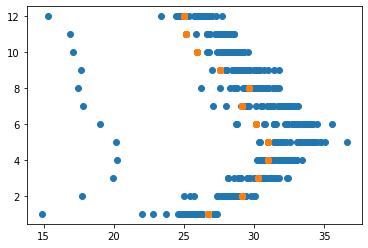

In [186]:
plt.scatter([test['mid_temp']],test['Month'])
plt.scatter([test['yhat']],test['Month'])
plt.show()


In [187]:
import pickle

In [188]:
filename = 'Cluster 15 - 8.sav'
pickle.dump(model, open(filename, 'wb'))

In [189]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(fut)

In [190]:
result.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1981-01-01,28.175586,22.279104,27.796345,28.175586,28.175586,-3.153058,-3.153058,-3.153058,-3.153058,-3.153058,-3.153058,0.0,0.0,0.0,25.022527
1,1981-02-01,28.176485,23.730910,29.338856,28.176485,28.176485,-1.849447,-1.849447,-1.849447,-1.849447,-1.849447,-1.849447,0.0,0.0,0.0,26.327038
2,1981-03-01,28.177298,25.942034,31.594678,28.177298,28.177298,0.456932,0.456932,0.456932,0.456932,0.456932,0.456932,0.0,0.0,0.0,28.634230
3,1981-04-01,28.178197,27.602584,33.287019,28.178197,28.178197,2.218242,2.218242,2.218242,2.218242,2.218242,2.218242,0.0,0.0,0.0,30.396440
4,1981-05-01,28.179068,28.596233,34.261188,28.179068,28.179068,3.205727,3.205727,3.205727,3.205727,3.205727,3.205727,0.0,0.0,0.0,31.384795
